# Example for Factorization Machine

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tfrs.fm import factorization_machine

In [2]:
ratings = pd.read_table('./ml-1m/ratings.dat', 
                        sep='::', 
                        header=None, 
                        names=['user_id','movie_id','rating','timestamp'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  after removing the cwd from sys.path.


In [3]:
ratings.head()

user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291

In [4]:
ratings.movie_id = ratings.movie_id + np.max(ratings.user_id)

## Build the factorization machine model

In [5]:
params = dict(
    feat_size=np.max(ratings.movie_id)+1,
    field_size=2,
    emb_size=8,
    l2_reg=0.01,
    loss_type="mse",
    learning_rate=0.01,
    verbose=True,
    train_writer="./model/train",
    test_writer="./model/test",
    log_device_placement=False
)

In [6]:
fm = factorization_machine.SimpleFactorizationMachine(**params)

total_parameters of the model: 89938


In [7]:
feat_index = ratings[["user_id", "movie_id"]].values
feat_value = np.ones(feat_index.shape)
label = ratings[["rating"]].values

In [8]:
frac = 0.2
sample_index = np.arange(feat_index.shape[0])
testing_index = np.random.choice(sample_index, int(frac*feat_index.shape[0]), replace=False)
training_index = np.setdiff1d(sample_index, testing_index, assume_unique=True)

In [9]:
feat_index_train = feat_index[training_index]
feat_value_train = feat_value[training_index]
label_train = label[training_index]

feat_index_test = feat_index[testing_index]
feat_value_test = feat_value[testing_index]
label_test = label[testing_index]

In [10]:
history = fm.fit(feat_index, feat_value, label,
                 valid_index=feat_index_test,
                 valid_value=feat_value_test,
                 valid_label=label_test,
                 early_stopping=5,
                 save_step=5,
                 save_path="./model",
                 summary_step=100)

Epoch 1/10



22.05s - avg loss: 1.7308 - val loss: 0.8326
Epoch 2/10



21.99s - avg loss: 0.8472 - val loss: 0.8310
Epoch 3/10



21.79s - avg loss: 0.8460 - val loss: 0.8302
Epoch 4/10



22.16s - avg loss: 0.8459 - val loss: 0.8312
Epoch 5/10



21.87s - avg loss: 0.8461 - val loss: 0.8295
Epoch 6/10



21.81s - avg loss: 0.8461 - val loss: 0.8305
Epoch 7/10



22.08s - avg loss: 0.8459 - val loss: 0.8319
Epoch 8/10



22.15s - avg loss: 0.8461 - val loss: 0.8288
Epoch 9/10



21.86s - avg loss: 0.8460 - val loss: 0.8303
Epoch 10/10



21.82s - avg loss: 0.8461 - val loss: 0.8304


## Read the training history

or you could run tensorboard during the training with  
$ tensorboard --logdir [model folder]

In [11]:
history

{'loss': [1.7307614843745245,
  0.8472083094428096,
  0.845991640831535,
  0.845924651639613,
  0.8460728351839846,
  0.8461393977070295,
  0.8458997186518026,
  0.8461436528929587,
  0.8460101029985926,
  0.8461177759320233],
 'val_loss': [0.8325529,
  0.831032,
  0.8301649,
  0.8312026,
  0.82946986,
  0.83050954,
  0.8319252,
  0.8287742,
  0.83025247,
  0.8304206]}

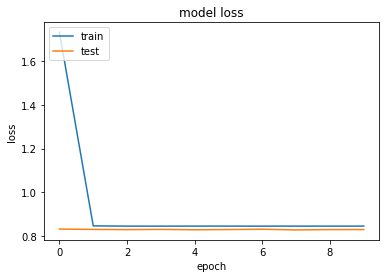

In [12]:
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Prediction

In [13]:
fm.predict(feat_index_test[:10], feat_value_test[:10])

[array([[3.3592117],
        [3.2918255],
        [4.9330997],
        [3.9751952],
        [3.606134 ],
        [3.4262712],
        [1.9367723],
        [3.7534986],
        [3.6995528],
        [3.0006976]], dtype=float32)]

In [14]:
label_test[:10]

array([[5],
       [3],
       [4],
       [5],
       [3],
       [3],
       [3],
       [5],
       [4],
       [2]])